# Upper Confidence Bound (UCB)

## Importing the libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [17]:
dataset = pd.read_csv('book_Optimisation.csv')

In [18]:
dataset

,Book 1,Book 2,Book 3,Book 4,Book 5,Book 6,Book 7,Book 8,Book 9,Book 10
0,0,0,0,1,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,0,0,1
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,1,1


## Implementing UCB

In [19]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

## Visualising the results

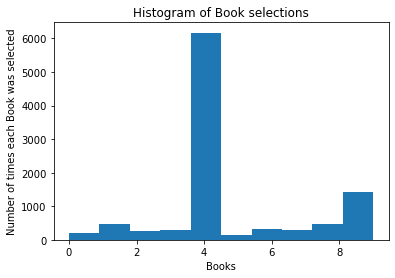

In [20]:
plt.hist(ads_selected)
plt.title('Histogram of Book selections')
plt.xlabel('Books')
plt.ylabel('Number of times each Book was selected')
plt.show()